# Stock Prediction Using Regression

In [380]:
import numpy as np
import pandas as pd
import sklearn
import pandas_datareader.data as dr
import numpy
import datetime as dt
import matplotlib.pyplot as plt

## Loding the data 

In [381]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 7, 21)

df = dr.DataReader("AAPL", 'yahoo', start, end)

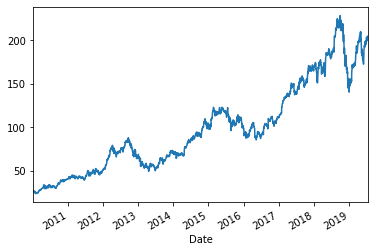

In [382]:
df["Adj Close"].plot();

## Feature Engineering

In [383]:
df['HighLowPer'] = 100 * (df['High'] - df['Low']) / df['Close']
df['ChangePer'] = 100 * (df['Close'] - df['Open']) / df['Open']
#df = df.loc[:, ['HighLowPer', 'ChangePer', 'Volume', 'Adj Close']]

In [445]:
#from sklearn.preprocessing import MinMaxScaler
df.describe()

#scaler = MinMaxScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

,High,Low,Open,Close,Volume,Adj Close,HighLowPer,ChangePer
count,2402.000000,2402.000000,2402.000000,2402.000000,2.402000e+03,2402.000000,2402.000000,2402.000000
mean,105.257767,103.369846,104.330868,104.337951,7.716680e+07,98.075045,1.867837,-0.000169
std,50.121809,49.298222,49.683231,49.720494,5.920738e+07,50.842294,1.126361,1.282497
min,28.000000,27.178572,27.481428,27.435715,1.136200e+07,23.943514,0.415020,-6.633069
25%,64.123213,62.891430,63.435715,63.301786,3.254165e+07,56.209198,1.152255,-0.720349
50%,97.684998,95.819286,96.810001,96.775002,5.877475e+07,90.257355,1.631669,0.040353
75%,138.462494,136.962502,137.762501,138.287495,1.048166e+08,133.072086,2.290872,0.746319
max,233.470001,229.779999,230.779999,232.070007,4.702495e+08,228.523819,23.959393,8.696110


## Splitting data into X and y, and loading final test data 

In [446]:
leave_out = 30  # days
y = df['Adj Close'].shift(-leave_out)[0:-leave_out]
#df.drop(['Adj Close'], axis = 1, inplace = True)
X = df[:-leave_out]

X_test = df[-leave_out:]

In [447]:

start = dt.datetime(2019, 7, 23)
end = dt.datetime(2019, 9, 3)

df_test = dr.DataReader("AAPL", 'yahoo', start, end)
y_test = df_test['Adj Close']



## Splitting data into training and validation

In [387]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(np.array(X), 
                                                  np.array(y), 
                                                  test_size = 0.2)

## Training the Regression Models

In [388]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
pred_lin = reg_lin.predict(X_val)
r2_lin = r2_score(y_val, pred_lin)

reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train, y_train)
pred_dt = reg_dt.predict(X_val)
r2_dt = r2_score(y_val, pred_dt)

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
pred_rf = reg_rf.predict(X_val)
r2_rf = r2_score(y_val, pred_rf)

/home/aitabuzaid/venv/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Performs well on training and validation data 

In [389]:
print(r2_lin, r2_dt, r2_rf)

0.9606304670719334 0.9432026332367904 0.9712016908114861


In [390]:
future_pred = reg_rf.predict(X_test)

## And very poorly on unseen test data (overfitting)

In [391]:
r2_score(future_pred, y_test)

-3.5355943044432063

In [392]:
df_test['Adj Close Pred'] = future_pred


## Plotting future stock prediction

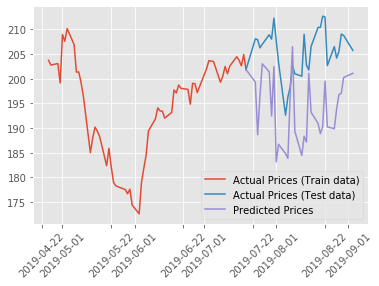

In [444]:
import matplotlib.pyplot as plt

fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.style.use('ggplot')

pt = plt.plot(df['Adj Close'][-60:], label='Actual Prices (Train data)')

df_test.loc[df['Adj Close'].index[-1]] = df['Adj Close'][-1]
df_test.sort_index(inplace=True)

plt.plot(df_test['Adj Close'], label='Actual Prices (Test data)')
plt.plot(df_test['Adj Close Pred'], label='Predicted Prices')
ax.tick_params(axis ='x', rotation =45) 
plt.legend();
